In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\HP\Desktop\codellc\UnilorinCompetition\Train_v2.csv')
test =  pd.read_csv(r'C:\Users\HP\Desktop\codellc\UnilorinCompetition\Test_v2.csv')

In [3]:
# Concat the two dataframes together
df = pd.concat([train, test], ignore_index= True)

In [4]:
df.head(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


Picked the specific necessary columns and combined them all into a new variable

In [5]:
features = ['location_type', 'cellphone_access', 'household_size', 'job_type', 'relationship_with_head',
           'education_level']

target = 'bank_account'

In [6]:
# Check for missing values
df.isnull().sum()

country                       0
year                          0
uniqueid                      0
bank_account              10086
location_type                 0
cellphone_access              0
household_size                0
age_of_respondent             0
gender_of_respondent          0
relationship_with_head        0
marital_status                0
education_level               0
job_type                      0
dtype: int64

In [7]:
df.shape

(33610, 13)

In [8]:
df.describe()

,year,household_size,age_of_respondent
count,33610.000000,33610.000000,33610.000000
mean,2016.975930,3.791877,38.656114
std,0.847353,2.223138,16.447127
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


We will likely drop the row that has a household_size of 21 because it is an outlier.

In [170]:
df.dtypes[df.dtypes == 'object'].index

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

### Univariate Analysis 

<AxesSubplot:xlabel='bank_account'>

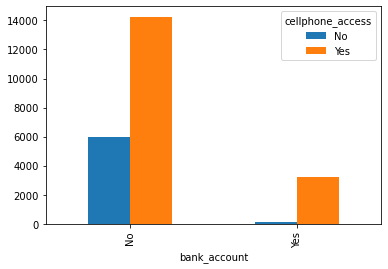

In [22]:
pd.crosstab(df['bank_account'], df['cellphone_access']).plot(kind = 'bar')

In [58]:
pd.crosstab(df['bank_account'], df['job_type'], margins= True)
# .plot(kind = 'bar')

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
bank_account,,,,,,,,,,,
No,112,4806,87,484,197,5152,614,884,2287,5589,20212
Yes,14,635,300,571,50,445,13,196,240,848,3312
All,126,5441,387,1055,247,5597,627,1080,2527,6437,23524


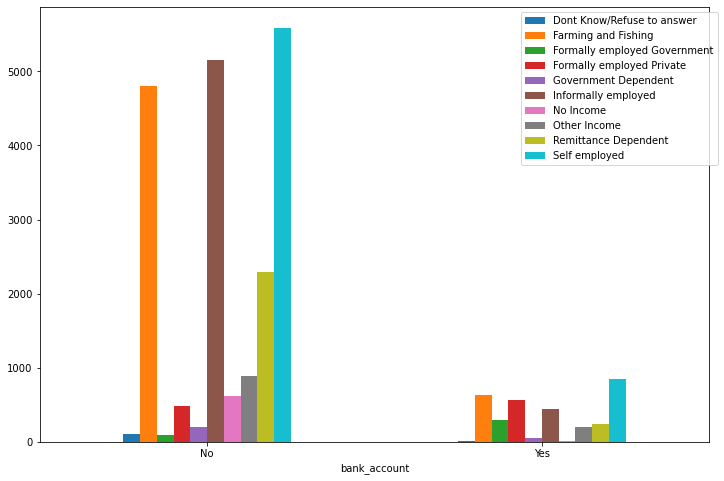

In [57]:
pd.crosstab(df['bank_account'], df['job_type']).plot(kind = 'bar', figsize = (12,8))
plt.xticks(rotation = 0)


plt.legend(bbox_to_anchor =(1.02,1))
plt.show()

From the above visualization, it is clear that a very large number of datapoints in our dataset do NOT have bank accounts. furthermore, with the job_type, it shows that on comparison, it is only those who are formally employed by the government have more bank accounts opened.

In [41]:
# This calculates the percentage of the people who have bank accounts in the dataset and it can be infered that this dataset is imbalanced and weighted to one side
(df[df['bank_account'] == 'Yes']['bank_account'].count() / len(df)) * 100


9.854210056530794

### Preprocessing

Convert all object datatypes into numerical datatypes

In [11]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [12]:
labEnc = LabelEncoder()
labBin = LabelBinarizer()

In [9]:
fea_df = df[features]

In [10]:
fea_df.head()

,location_type,cellphone_access,household_size,job_type,relationship_with_head,education_level
0,Rural,Yes,3,Self employed,Spouse,Secondary education
1,Rural,No,5,Government Dependent,Head of Household,No formal education
2,Urban,Yes,5,Self employed,Other relative,Vocational/Specialised training
3,Rural,Yes,5,Formally employed Private,Head of Household,Primary education
4,Urban,No,8,Informally employed,Child,Primary education


In [13]:
fea_df['location_type'] = labBin.fit_transform(fea_df['location_type'])
fea_df['cellphone_access'] = labEnc.fit_transform(fea_df['cellphone_access'])
fea_df['relationship_with_head'] = labEnc.fit_transform(fea_df['relationship_with_head'])
fea_df['education_level'] = labBin.fit_transform(fea_df['education_level'])
fea_df['job_type'] = labBin.fit_transform(fea_df['job_type'])

<ipython-input-13-7107fa9c92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fea_df['location_type'] = labBin.fit_transform(fea_df['location_type'])
<ipython-input-13-7107fa9c92e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fea_df['cellphone_access'] = labEnc.fit_transform(fea_df['cellphone_access'])
<ipython-input-13-7107fa9c92e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [16]:
train_df = fea_df[:len(train)]
test_df = fea_df[len(train):]

In [17]:
train_df.shape, train.shape, test_df.shape, test.shape

((23524, 6), (23524, 13), (10086, 6), (10086, 12))

In [18]:
X = train_df.copy()

In [19]:
y = df[:len(train)]['bank_account']

In [20]:
bank_account_map = {'Yes': 1, 'No': 0}
y = y.map(bank_account_map)

In [21]:
test_X = test_df[X.columns]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state= 2021)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21171, 6)
(21171,)
(2353, 6)
(2353,)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=2000, learning_rate=0.01, max_depth=7)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=200)

0:	learn: 0.6842954	test: 0.6844199	best: 0.6844199 (0)	total: 220ms	remaining: 7m 20s
200:	learn: 0.3561099	test: 0.3641358	best: 0.3641358 (200)	total: 3.01s	remaining: 26.9s
400:	learn: 0.3483503	test: 0.3559033	best: 0.3559033 (400)	total: 5.77s	remaining: 23s
600:	learn: 0.3469690	test: 0.3548641	best: 0.3548641 (600)	total: 8.45s	remaining: 19.7s
800:	learn: 0.3461062	test: 0.3548037	best: 0.3547574 (708)	total: 11.1s	remaining: 16.7s
1000:	learn: 0.3454413	test: 0.3550116	best: 0.3547574 (708)	total: 14.1s	remaining: 14.1s
1200:	learn: 0.3447905	test: 0.3552693	best: 0.3547574 (708)	total: 17s	remaining: 11.3s
1400:	learn: 0.3442741	test: 0.3556385	best: 0.3547574 (708)	total: 20.1s	remaining: 8.6s
1600:	learn: 0.3439054	test: 0.3559920	best: 0.3547574 (708)	total: 23s	remaining: 5.73s
1800:	learn: 0.3435788	test: 0.3562963	best: 0.3547574 (708)	total: 25.9s	remaining: 2.86s
1999:	learn: 0.3433144	test: 0.3565824	best: 0.3547574 (708)	total: 28.8s	remaining: 0us

bestTest = 0.35

In [63]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=5000, learning_rate=0.01,)
xgb_model.fit(X_train, y_train, verbose=200)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
grb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=7, max_features=10)
grb

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=10,
                           n_estimators=500)

In [28]:
grb.fit(X_train, y_train)

ValueError: max_features must be in (0, n_features]

In [34]:
y_pred = xgb_model.predict(X_test)

In [35]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
y_test[:5]

11354    0
8191     0
12584    0
8687     0
15930    0
Name: bank_account, dtype: int64

In [69]:
text_X_pred = xgb_model.predict(test_X)

In [70]:
text_X_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [71]:
test_pred_proba = xgb_model.predict_proba(test_X)

In [32]:
from sklearn.metrics import accuracy_score, f1_score

In [37]:
accuracy_score(y_test, y_pred)

0.850828729281768

In [38]:
sample_submission = pd.read_csv(r'C:\Users\HP\Desktop\codellc\UnilorinCompetition\SubmissionFile.csv')

In [72]:
sample_submission['bank_account'] = text_X_pred

In [73]:
sample_submission.to_csv('FirstSubmission_xgb.csv', index= False)

In [216]:
test_pred_proba[2]

array([0.97934004, 0.02065996])

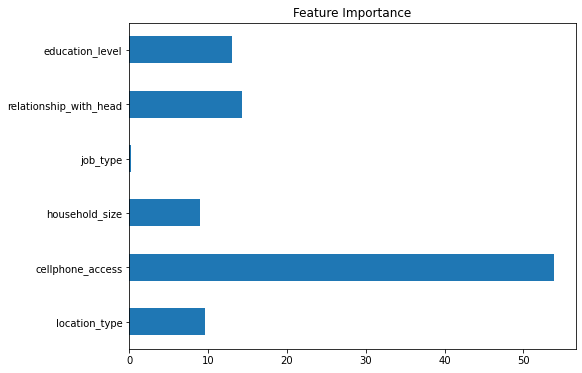

In [61]:
fea_imp = pd.Series(cat_model.feature_importances_, index=X.columns)

fea_imp.plot(kind='barh', figsize=(8,6), title='Feature Importance');